<a href="https://colab.research.google.com/github/manucastilla/iris_dectection/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
!git clone https://github.com/lucianosilva-github/G6_iris_recognition.git

Cloning into 'G6_iris_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [4]:
import G6_iris_recognition

In [5]:
!git clone https://github.com/lucianosilva-github/images-tutorial.git

Cloning into 'images-tutorial'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


## Limpando as imagens

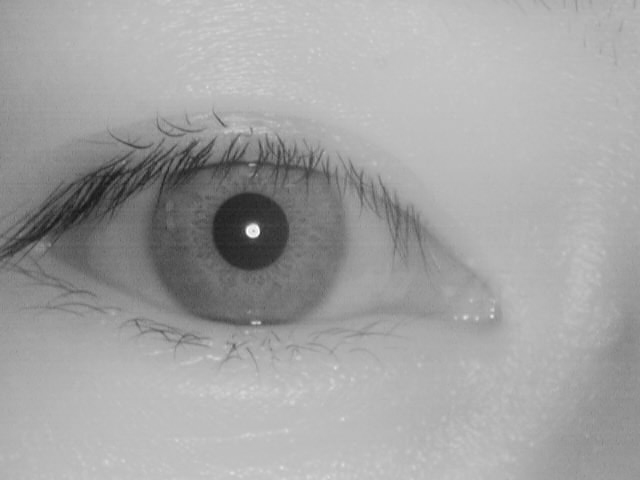

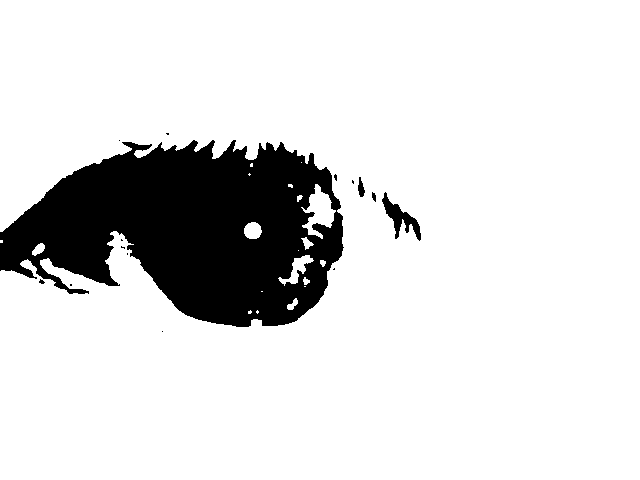

In [32]:
img = cv2.cvtColor(cv2.imread("images-tutorial/0002/0002_001.bmp"), cv2.COLOR_BGR2GRAY)
img_copy = img.copy()
img_copy = cv2.equalizeHist(img_copy)
blur = cv2.blur(img_copy, (5,5))
T, img_copyt1 = cv2.threshold(blur,35,255,cv2.THRESH_BINARY)


cv2_imshow(img)
cv2_imshow(img_copyt1)


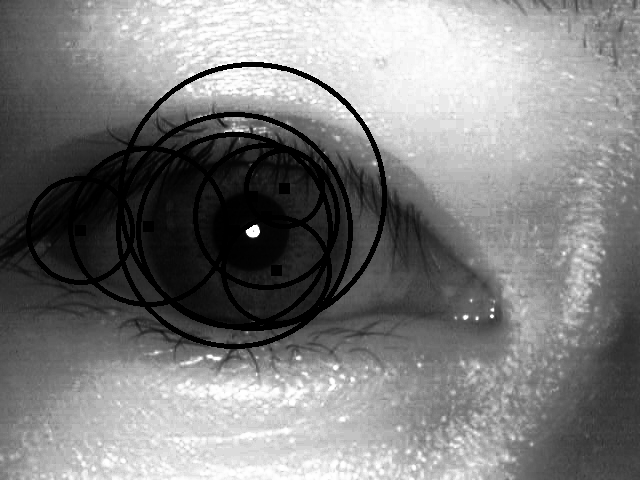

In [46]:
edges = cv2.Canny(img_copyt1,20,220)
hough_circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,500,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

#https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
# ensure at least some circles were found
if hough_circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
  circles = np.round(hough_circles[0, :]).astype("int")
	
  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circles:
		# draw the circle in the output image
		# corresponding to the center of the circle
    cv2.circle(img_copy, (x, y), r, (0, 255, 0), 4)
    # cv2.circle(img_copy, (x, y), r, (0, 255, 0), 4)
    
  # show the output image
  # cv2.imshow("output", np.hstack([img, img_copy]))
    
    cv2_imshow(img_copy)